# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete=pd.merge(study_results,mouse_metadata,how='left',on=['Mouse ID'])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count=mouse_data_complete['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=mouse_data_complete[mouse_data_complete.duplicated(['Mouse ID','Timepoint'],keep=False)]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean=mouse_data_complete[mouse_data_complete['Mouse ID'] != 'g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# get each statistic by groupby function

#get mean and median individually and merge
means=mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians=mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
merge1=pd.merge(means,medians,on=['Drug Regimen'], how='outer',suffixes=(' mean',' median'))

#get standard deviation and merge again
mouse_stdev=pd.DataFrame(mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
merge2=pd.merge(merge1,mouse_stdev,on=['Drug Regimen'], how='outer', suffixes=(None, ' std dev'))

#get variance with var vunction and merge
mouse_var=pd.DataFrame(mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
merge3=pd.merge(merge2,mouse_var,on=['Drug Regimen'],how='outer',suffixes=(None,' variance'))

#get standard error with sem function and merge again
mouse_sem=pd.DataFrame(mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
mouse_data_merged=pd.merge(merge3,mouse_sem,on=['Drug Regimen'],how='outer',suffixes=(None, ' std error'))

In [8]:
#clean up column names
mouse_summary=mouse_data_merged.rename(columns={'Tumor Volume (mm3) mean':'Mean Tumor Volume'
                                               ,'Tumor Volume (mm3) median':'Median Tumor Volume'
                                               ,'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'
                                               ,'Tumor Volume (mm3) variance':'Tumor Volume Variance'
                                               ,'Tumor Volume (mm3) std error':'Tumor Volume Std. Err.'})
mouse_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

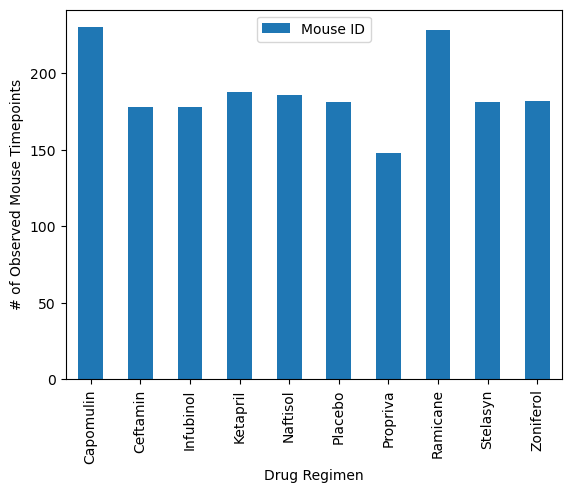

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen=mouse_data_clean.groupby('Drug Regimen')['Mouse ID'].count()
rows_per_regimen=pd.DataFrame(rows_per_regimen)
rows_per_regimen.plot(kind='bar', ylabel='# of Observed Mouse Timepoints')
plt.show()

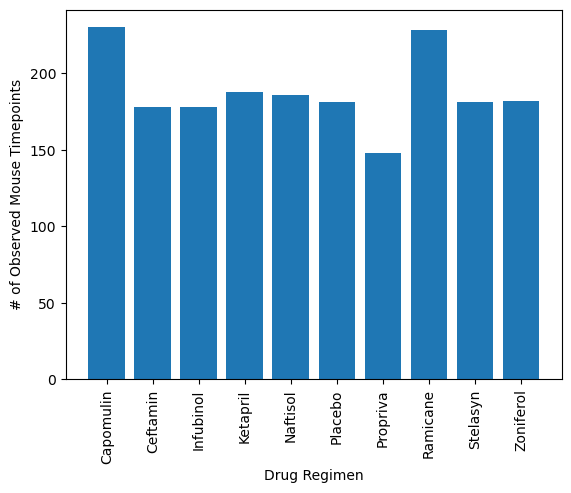

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(rows_per_regimen))
y_axis=rows_per_regimen['Mouse ID']
plt.bar(x_axis,y_axis,align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
x_datalabels=rows_per_regimen.index
x_ticks=[value for value in x_axis]
plt.xticks(x_ticks,x_datalabels,rotation=90)
plt.show()

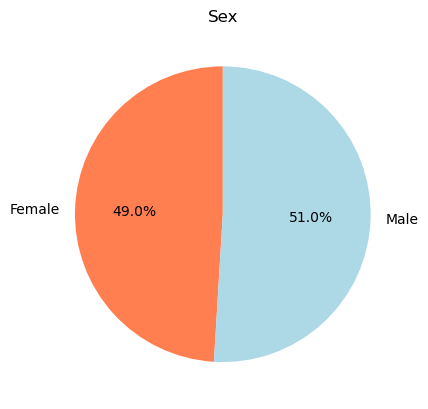

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex=mouse_data_clean.groupby('Sex')['Mouse ID'].count()

mouse_sex.plot(kind='pie',y=mouse_sex,ylabel='',autopct="%1.1f%%",colors=['coral','lightblue'],title='Sex',startangle=90)
plt.show()

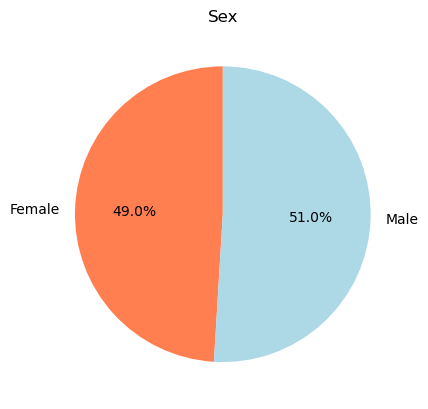

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels=mouse_sex.index.tolist()

values=mouse_sex.tolist()

colors=['coral','lightblue']

plt.pie(values,labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#create set with only the desired drug regimens

maxtime_mouse=pd.DataFrame(mouse_data_clean.groupby('Mouse ID')['Timepoint'].max())
maxtime_mouse.reset_index()

#merge max time with clean data frame--use inner merge (only keeps the ones that match) merge on mouse id and timepoint
final_tumors=maxtime_mouse.merge(mouse_data_clean,on=['Mouse ID','Timepoint'],how='inner')
final_tumors.head(50)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    #subset where drug regimen is current one from list
    tumor_df=final_tumors[(final_tumors['Drug Regimen'] == drug)]
    
    #create a list with all the tumor volumes for current drug
    volumes=tumor_df['Tumor Volume (mm3)']   
    #append this list to the tumor_vol list
    tumor_vol.append(volumes)
    # Determine outliers using upper and lower bounds
    quartiles=volumes.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print outliers in each round of the loop using the quartile calculation
    outliers = tumor_df.loc[(tumor_df['Tumor Volume (mm3)'] < lower_bound) | (tumor_df['Tumor Volume (mm3)'] > upper_bound)]
    display(outliers)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
31,c326,5,36.321346,0,Infubinol,Female,18,25


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


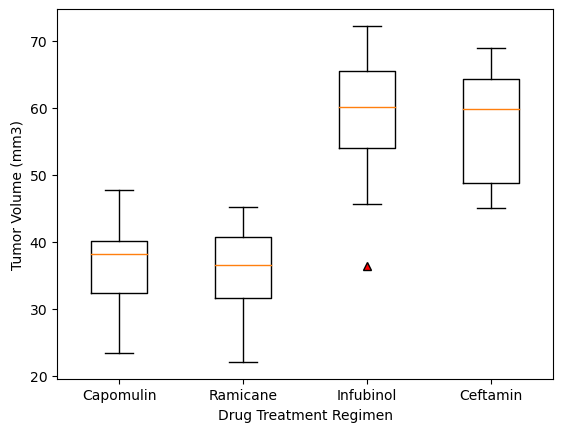

In [49]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops=dict(marker='^', markerfacecolor='r')
plt.boxplot(tumor_vol, flierprops=flierprops)
plt.xticks([1,2,3,4],treatments)
plt.xlabel('Drug Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

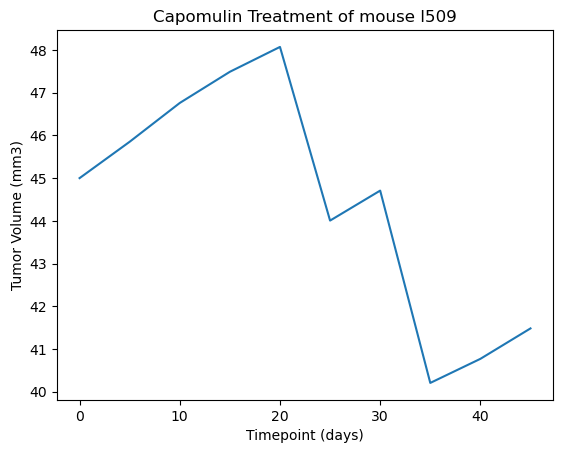

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#create a cut of the clean dataframe that is all the timepoints of a single mouse (I509)
single_mouse=mouse_data_clean[(mouse_data_clean['Mouse ID']=='l509')]
plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


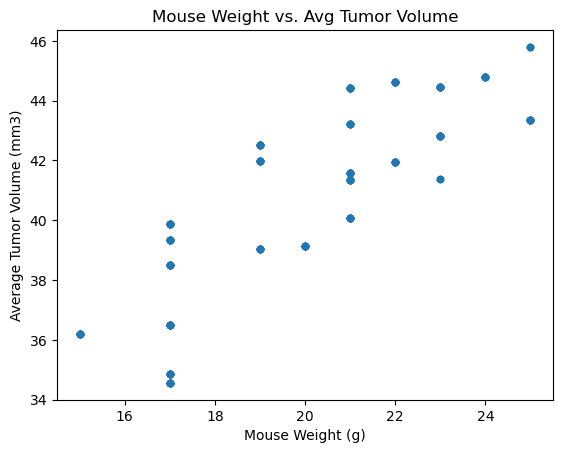

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#create a cut of the clean dataframe that is only the Capomulin regimen
Capomulin_df=mouse_data_clean[(mouse_data_clean['Drug Regimen']=='Capomulin')]

#calculate the average tumor volume per mouse for this cut of the data
Capo_avg=pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
Capo_avg.reset_index()
#create a dataframe that is weight vs. avg tumor volume
Capo_mice=Capo_avg.merge(Capomulin_df, on=['Mouse ID'], how='inner')
Capo_mice.drop_duplicates(subset='Mouse ID')
#use .plot to create a scatter plot of the weight vs. avg tumor volume  df
Capo_mice.plot(x='Weight (g)'
               , y="Tumor Volume (mm3)_x"
               , kind='scatter'
               , xlabel='Mouse Weight (g)'
               , ylabel='Average Tumor Volume (mm3)'
               , title='Mouse Weight vs. Avg Tumor Volume')
plt.show()

## Correlation and Regression

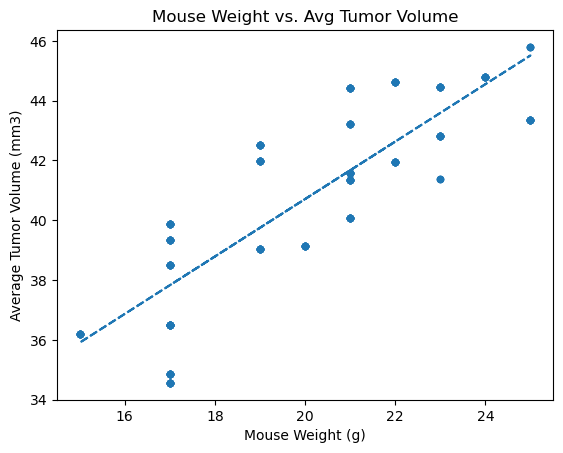

In [69]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Cm_weight=Capo_mice['Weight (g)']
Cm_avgTV=Capo_mice['Tumor Volume (mm3)_x']

c_coeff=round(st.pearsonr(Cm_weight,Cm_avgTV)[0],2)

#use linregress to find the terms of the regression line equation
slope, int, r, p, std_err = st.linregress(Cm_weight,Cm_avgTV)
fit = slope * Cm_weight + int

#re-do scatter plot and add regression line
Capo_mice.plot(x='Weight (g)'
               , y="Tumor Volume (mm3)_x"
               , kind='scatter'
               , xlabel='Mouse Weight (g)'
               , ylabel='Average Tumor Volume (mm3)'
               , title='Mouse Weight vs. Avg Tumor Volume')
plt.plot(Cm_weight,fit,"--")

plt.show()